In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## **在线新闻流行度分析**

在互联网和社交媒体日益发达的今天，在线新闻成为了人们日常生活中重要的组成部分。那么，一个新闻为什么受读者欢迎是一个令人很感兴趣的话题。下面我们通过三万多条新闻数据和它们对应的特征来分析并预测新闻的流行程度。

首先读取文件并简单查看文件的内容。

In [10]:
try:
    df = pd.read_csv('OnlineNewsPopularity.csv')
except FileNotFoundError:
    print("未能找到文件。")

In [11]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [12]:
df.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

可以看到数据有61列，包含发布时间、标题信息、文本信息、新闻主题等等特征，最后一列shares是新闻流行程度，也是我们要分析的主要变量。我们首先对shares进行观察。

In [13]:
class news():
    def __init__(self, df):
        self.NewsSet = df
    
    def getmean(self, column):
        return np.mean(self.NewsSet[column])

    def getmedian(self, column):
        return np.median(self.NewsSet[column])

    def getstd(self, column):
        return np.std(self.NewsSet[column])

首先计算出shares的平均值和方差，发现数据中位数是1400，平均值在3400左右，方差在11600左右，说明数据方差较大且分布不均匀。

In [14]:
News = news(df)
print('The median of shares is ', News.getmedian(' shares'))
print('The mean of shares is ', News.getmean(' shares'))
print('The std of shares is ', News.getstd(' shares'))

The median of shares is  1400.0
The mean of shares is  3395.3801836343455
The std of shares is  11626.80410572882


接下来画出数据的直方图进行分析。观察发现shares的大部分样本都集中在最左侧的区域，但有一些新闻的流行度非常高。

(array([3.9457e+04, 1.3800e+02, 2.6000e+01, 1.0000e+01, 3.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        1.0000e+00]),
 array([1.00000000e+00, 5.27071875e+04, 1.05413375e+05, 1.58119562e+05,
        2.10825750e+05, 2.63531938e+05, 3.16238125e+05, 3.68944312e+05,
        4.21650500e+05, 4.74356688e+05, 5.27062875e+05, 5.79769062e+05,
        6.32475250e+05, 6.85181438e+05, 7.37887625e+05, 7.90593812e+05,
        8.43300000e+05]),
 <BarContainer object of 16 artists>)

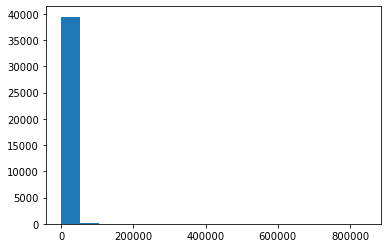

In [15]:
plt.hist(df[' shares'], bins=16)

针对这种情况，我们选择把流行度转换成0-1变量，把shares大于中位数1400的样本看做流行的，把shares小于中位数1400的样本看做不流行的，进行后续的分析。

In [16]:
df['popularity'] = (df[' shares'] > 1400).astype(int)
df

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares,popularity
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593,0
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711,0
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500,1
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200,0
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,http://mashable.com/2014/12/27/samsung-app-aut...,8.0,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,...,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000,1800,1
39640,http://mashable.com/2014/12/27/seth-rogen-jame...,8.0,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,...,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000,1900,1
39641,http://mashable.com/2014/12/27/son-pays-off-mo...,8.0,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,...,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364,1900,1
39642,http://mashable.com/2014/12/27/ukraine-blasts/,8.0,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,...,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000,1100,0


接下来，我们计算每条新闻的59个特征与新闻流行度的相关性并得到F得分和p值。可以看到大部分的变量都是显著的。

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

x = df[df.columns[1:60]]
y = df[df.columns[61]]

x = (x - x.min()) / (x.max() - x.min())

bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
dfpvalues = pd.DataFrame(fit.pvalues_)

featureScores = pd.concat([dfcolumns,dfscores,dfpvalues],axis=1)
featureScores.columns = ['Specs','Score','Pvalue']
featureScores.nlargest(60,'Score')

,Specs,Score,Pvalue
26,kw_avg_avg,1069.175638,1.995032e-231
40,LDA_02,994.916876,1.074219e-215
17,data_channel_is_world,921.539910,4.025818e-200
37,is_weekend,765.241268,7.535373e-167
13,data_channel_is_entertainment,490.546835,4.911061e-108
15,data_channel_is_socmed,486.827146,3.095177e-107
35,weekday_is_saturday,456.632391,9.637629e-101
16,data_channel_is_tech,363.606381,1.062182e-80
24,kw_min_avg,341.262071,7.063526e-76
6,num_hrefs,311.956031,1.513442e-69


计算这些变量的相关性，下面是一些具有较高相关性的变量，比如说n_unique_tokens、n_non_stop_unique_tokens和n_non_stop_words之间有很强的相关性，is_weekend和weekday_is_sunday、weekday_is_saturday也有很高的相关性。

In [18]:
# 相关性
df_corr = df.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr.drop(df_corr.iloc[1::2].index, inplace=True)
df_corr_nd = df_corr.drop(df_corr[df_corr['Correlation Coefficient'] == 1.0].index)
# 相关度较高的特征
corr = df_corr_nd['Correlation Coefficient'] > 0.5
df_corr_nd[corr]

,Feature 1,Feature 2,Correlation Coefficient
62,n_unique_tokens,n_non_stop_unique_tokens,0.999852
64,n_non_stop_words,n_unique_tokens,0.999572
66,n_non_stop_unique_tokens,n_non_stop_words,0.999532
68,kw_max_min,kw_avg_min,0.940529
70,kw_max_max,kw_min_min,0.857226
72,self_reference_avg_sharess,self_reference_max_shares,0.853480
74,data_channel_is_world,LDA_02,0.836618
76,self_reference_avg_sharess,self_reference_min_shares,0.818907
78,kw_max_avg,kw_avg_avg,0.811864
80,global_rate_negative_words,rate_negative_words,0.779556


根据特征的相关性和显著程度，我们去掉一部分特征得到新的数据集。

In [19]:
drop = [' weekday_is_friday', ' weekday_is_monday', ' weekday_is_thursday', ' data_channel_is_lifestyle', ' weekday_is_tuesday', ' n_non_stop_words',
 ' weekday_is_wednesday', ' max_negative_polarity', ' abs_title_subjectivity', ' n_non_stop_unique_tokens', ' n_unique_tokens', ' min_negative_polarity', 
 ' avg_negative_polarity', ' data_channel_is_bus', ' kw_min_max', ' num_videos', 'url', 'popularity', ' shares']
df2 = df.drop(columns = drop)

对于最显著的几个特征，先对连续特征kw_avg_avg（普通关键词平均流行度）、LDA_02（话题类型二）、kw_min_avg（最差关键词平均流行度）和num_hrefs（链接数）画出直方图，观察分布特征和它们与流行度之间的关系。可以看出，这些特征的分布均有一定的右偏。流行新闻的kw_avg_avg、kw_min_avg、num_hrefs略大于不流行新闻的kw_avg_avg、kw_min_avg、num_hrefs。

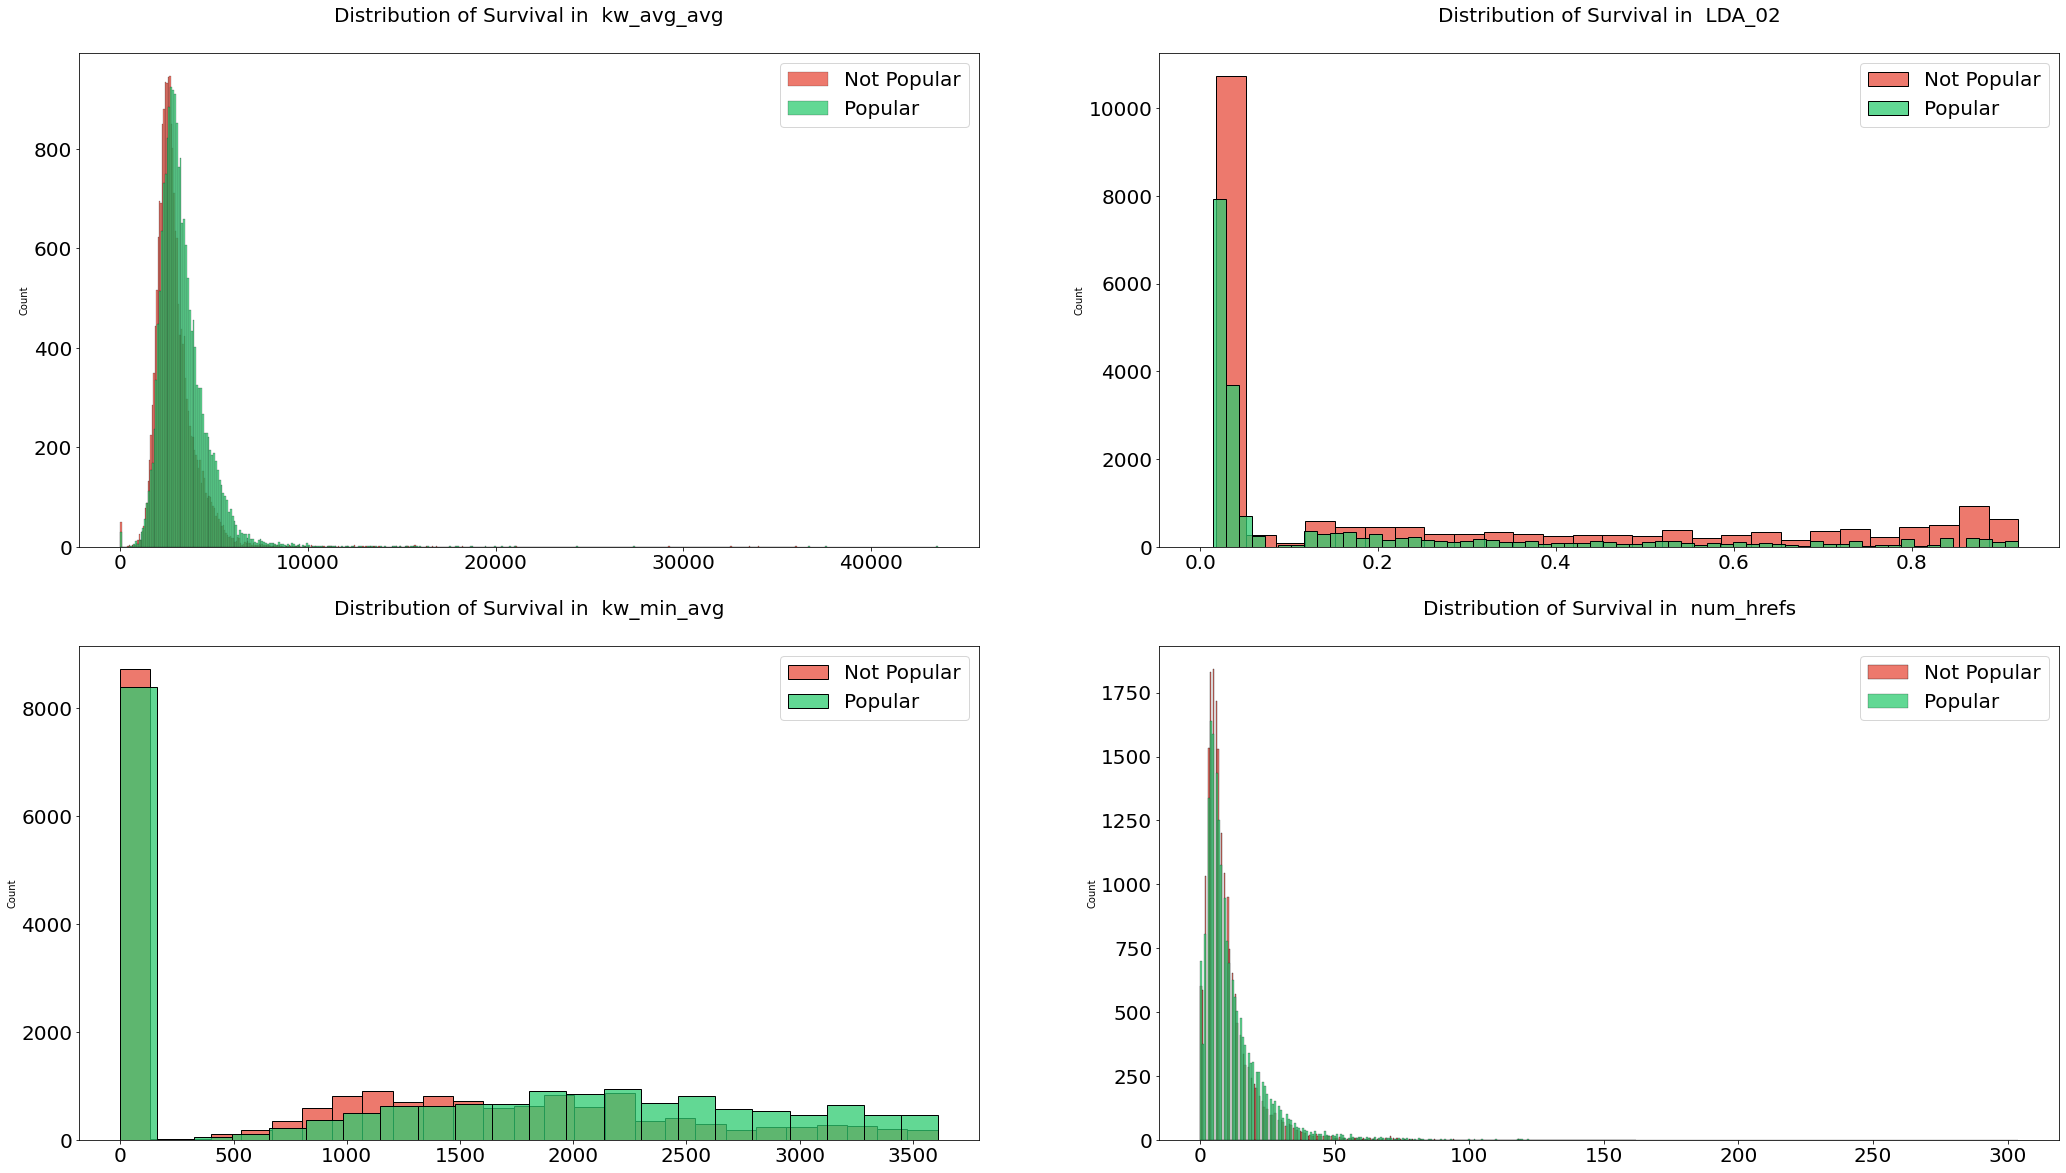

In [20]:
cont_features = [' kw_avg_avg', ' LDA_02', ' kw_min_avg', ' num_hrefs']
popu = df['popularity'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

sns.histplot(df[~popu][cont_features[0]], label='Not Popular', color='#e74c3c', ax=axs[0][0])
sns.histplot(df[popu][cont_features[0]], label='Popular', color='#2ecc71', ax=axs[0][0])
sns.histplot(df[~popu][cont_features[1]], label='Not Popular', color='#e74c3c', ax=axs[0][1])
sns.histplot(df[popu][cont_features[1]], label='Popular', color='#2ecc71', ax=axs[0][1])
sns.histplot(df[~popu][cont_features[2]], label='Not Popular', color='#e74c3c', ax=axs[1][0])
sns.histplot(df[popu][cont_features[2]], label='Popular', color='#2ecc71', ax=axs[1][0])
sns.histplot(df[~popu][cont_features[3]], label='Not Popular', color='#e74c3c', ax=axs[1][1])
sns.histplot(df[popu][cont_features[3]], label='Popular', color='#2ecc71', ax=axs[1][1])

axs[0][0].set_xlabel('')
axs[0][1].set_xlabel('')
axs[1][0].set_xlabel('')
axs[1][1].set_xlabel('')

axs[0][0].tick_params(axis='x', labelsize=20)
axs[0][0].tick_params(axis='y', labelsize=20)
axs[0][1].tick_params(axis='x', labelsize=20)
axs[0][1].tick_params(axis='y', labelsize=20)
axs[1][0].tick_params(axis='x', labelsize=20)
axs[1][0].tick_params(axis='y', labelsize=20)
axs[1][1].tick_params(axis='x', labelsize=20)
axs[1][1].tick_params(axis='y', labelsize=20)

axs[0][0].legend(loc='upper right', prop={'size': 20})
axs[0][1].legend(loc='upper right', prop={'size': 20})
axs[1][0].legend(loc='upper right', prop={'size': 20})
axs[1][1].legend(loc='upper right', prop={'size': 20})
axs[0][0].set_title('Distribution of Survival in {}'.format(cont_features[0]), size=20, y=1.05)
axs[0][1].set_title('Distribution of Survival in {}'.format(cont_features[1]), size=20, y=1.05)
axs[1][0].set_title('Distribution of Survival in {}'.format(cont_features[2]), size=20, y=1.05)
axs[1][1].set_title('Distribution of Survival in {}'.format(cont_features[3]), size=20, y=1.05)
        
plt.show()

再对显著的离散变量data_channel_is_world（世界频道）、is_weekend（周末发布）、data_channel_is_entertainment（娱乐频道）、data_channel_is_socmed（社交媒体频道）、weekday_is_saturday（周六）、data_channel_is_tech（技术频道）画图，观察分布特征和它们与流行度之间的关系。可以看出，世界频道和娱乐频道的新闻更受人们欢迎，社交媒体频道、技术频道和周末发布的新闻相对来说没有那么受欢迎。

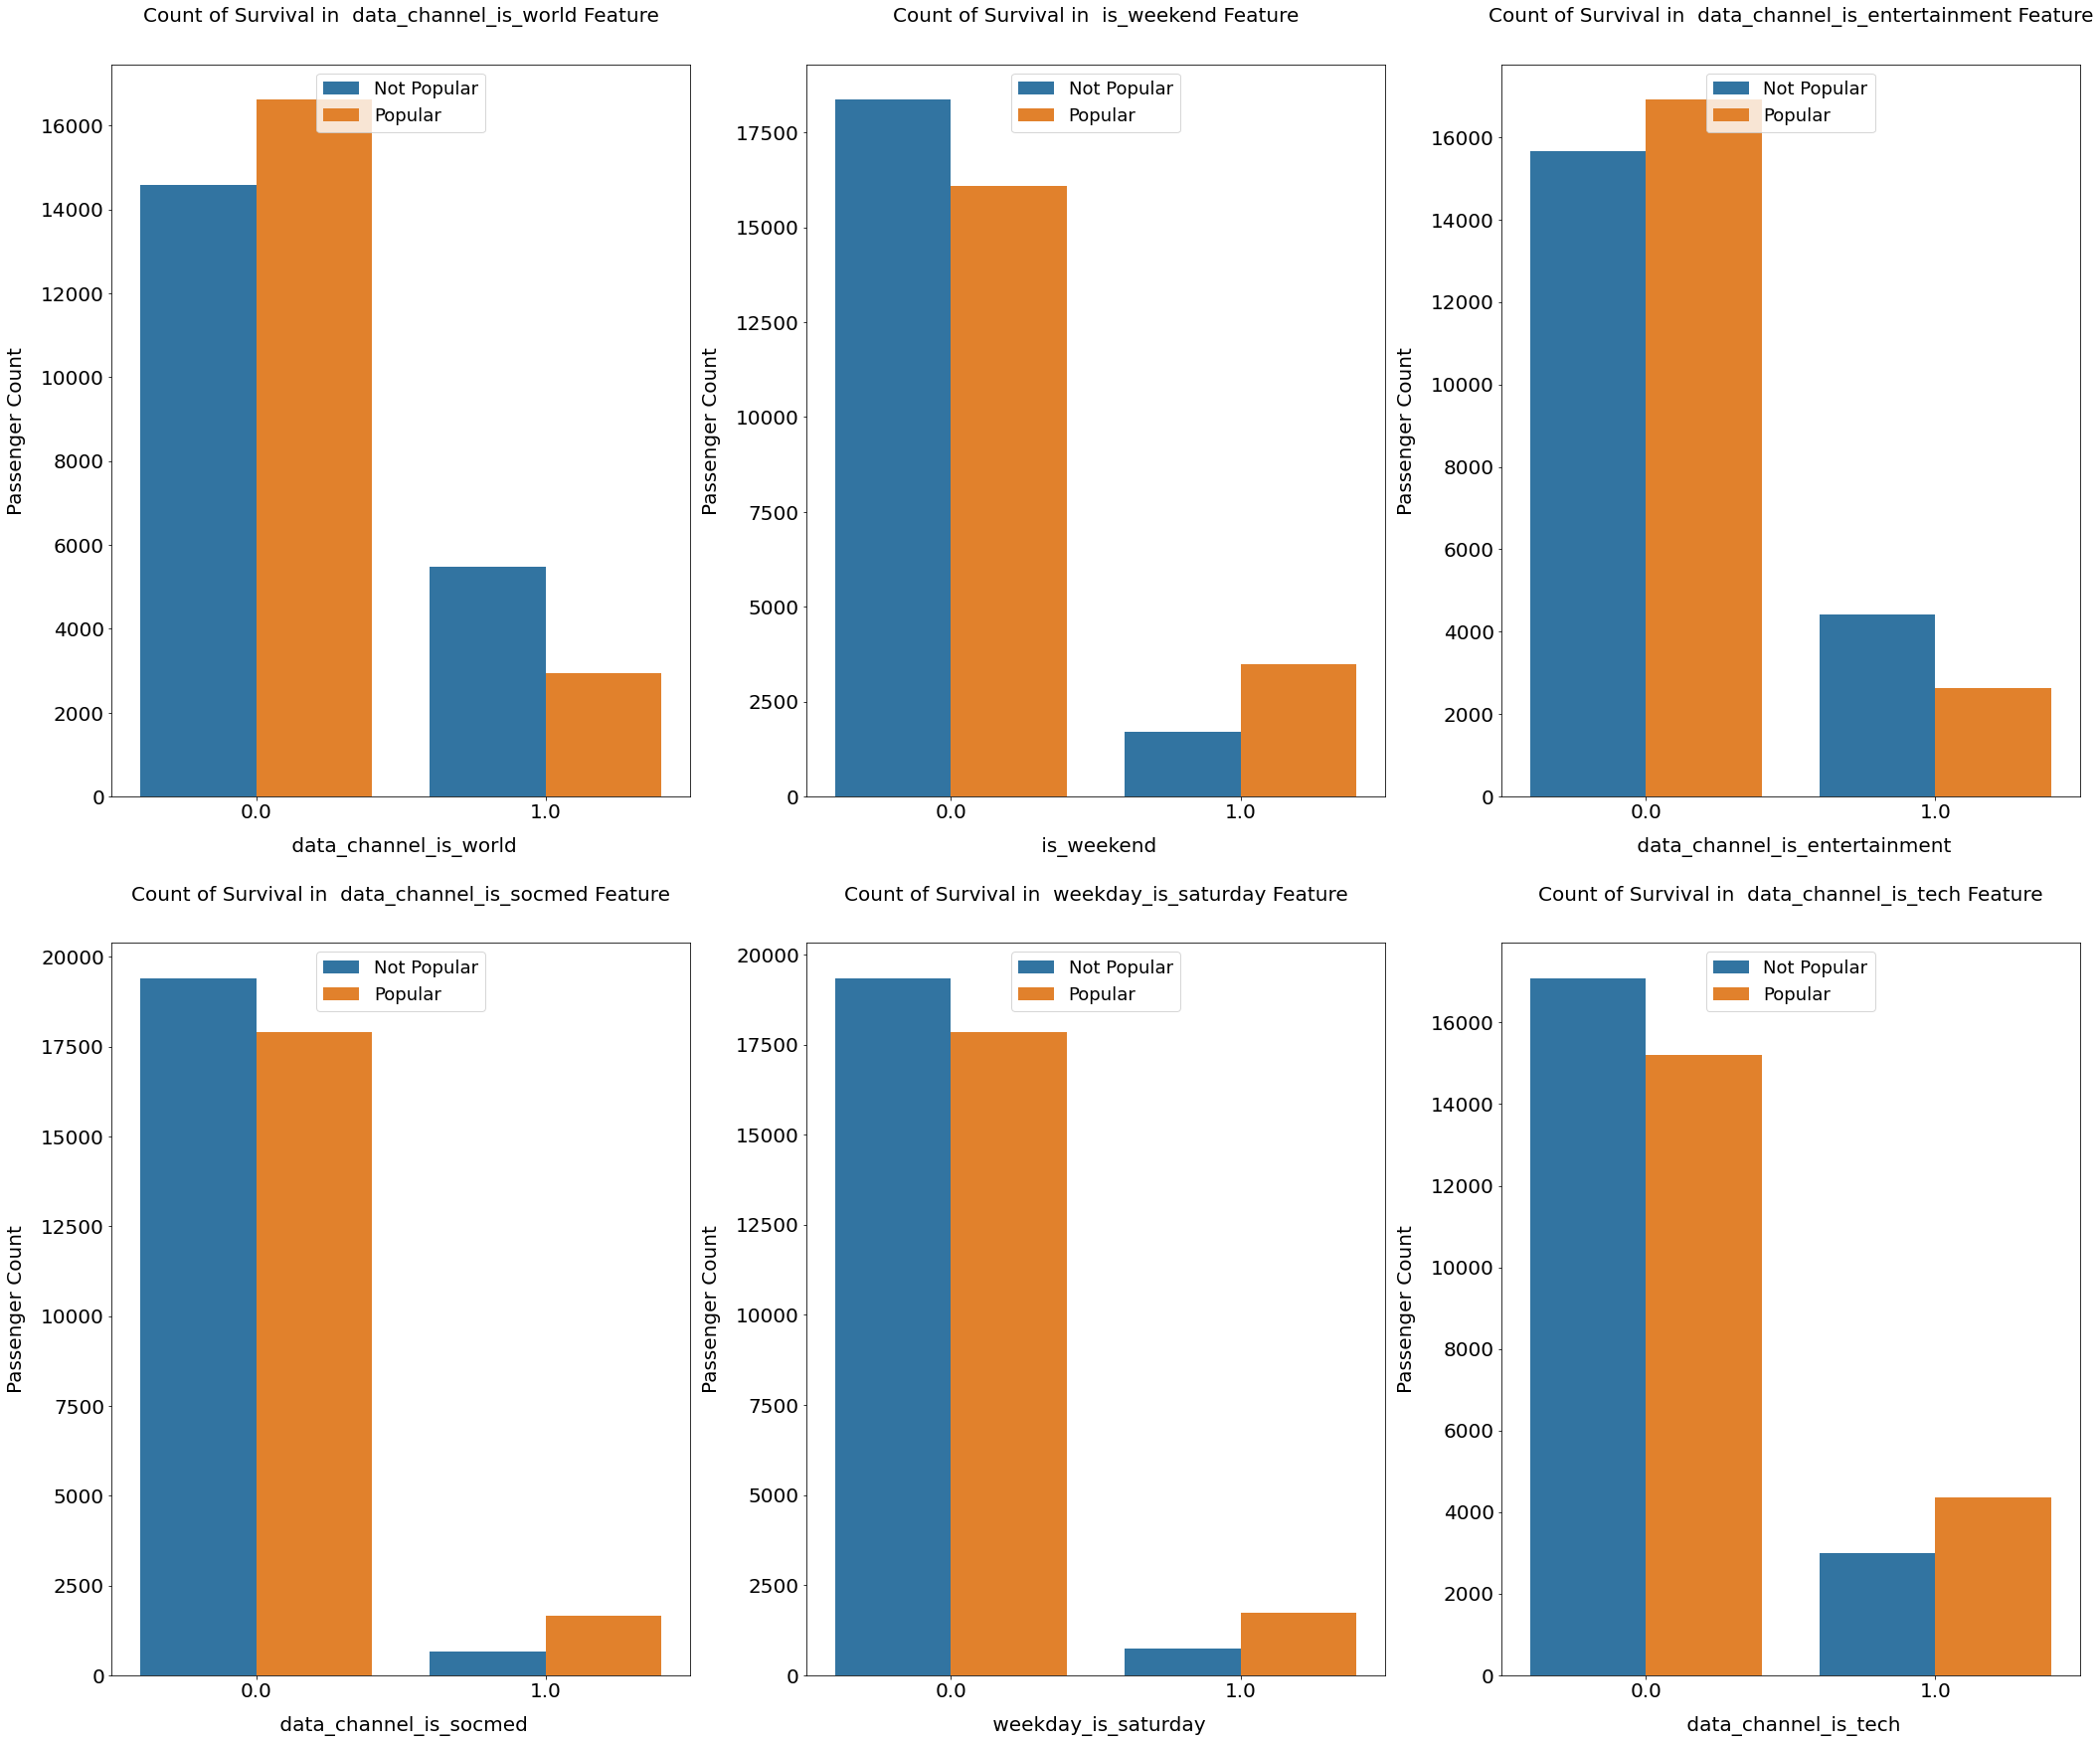

In [21]:
cat_features = [' data_channel_is_world', ' is_weekend', ' data_channel_is_entertainment', ' data_channel_is_socmed', ' weekday_is_saturday', ' data_channel_is_tech']

fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(20, 20))
plt.subplots_adjust(right=1.5, top=1.25)

for i, feature in enumerate(cat_features, 1):    
    plt.subplot(2, 3, i)
    sns.countplot(x=feature, hue='popularity', data=df)
    
    plt.xlabel('{}'.format(feature), size=20, labelpad=15)
    plt.ylabel('Passenger Count', size=20, labelpad=15)    
    plt.tick_params(axis='x', labelsize=20)
    plt.tick_params(axis='y', labelsize=20)
    
    plt.legend(['Not Popular', 'Popular'], loc='upper center', prop={'size': 18})
    plt.title('Count of Survival in {} Feature'.format(feature), size=20, y=1.05)

plt.show()

下面使用随机森林模型进行建模，使用已有的特征预测新闻的流行度。

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

model = RandomForestClassifier(criterion='gini', 
                               n_estimators=1100,
                               max_depth=5,
                               min_samples_split=4,
                               min_samples_leaf=5,
                               max_features='auto',
                               oob_score=True,
                               random_state=2022,
                               n_jobs=-1,
                               verbose=1)


In [23]:
X_train = StandardScaler().fit_transform(df2)
y_train = df['popularity'].values

In [24]:
N = 5
oob = 0
importances = pd.DataFrame(np.zeros((X_train.shape[1], N)), columns=['Fold_{}'.format(i) for i in range(1, N + 1)], index=df2.columns)
fprs, tprs, scores = [], [], []

skf = StratifiedKFold(n_splits=N, random_state=N, shuffle=True)

for fold, (trn_idx, val_idx) in enumerate(skf.split(X_train, y_train), 1):
    print('Fold {}\n'.format(fold))
    
    model.fit(X_train[trn_idx], y_train[trn_idx])
    
    # 计算训练集AUC分数
    trn_fpr, trn_tpr, trn_thresholds = roc_curve(y_train[trn_idx], model.predict_proba(X_train[trn_idx])[:, 1])
    trn_auc_score = auc(trn_fpr, trn_tpr)
    # 计算交叉验证集AUC分数
    val_fpr, val_tpr, val_thresholds = roc_curve(y_train[val_idx], model.predict_proba(X_train[val_idx])[:, 1])
    val_auc_score = auc(val_fpr, val_tpr)

    scores.append((trn_auc_score, val_auc_score))
    fprs.append(val_fpr)
    tprs.append(val_tpr)
    
    importances.iloc[:, fold - 1] = model.feature_importances_
        
    oob += model.oob_score_ / N
    print('Fold {} OOB Score: {}\n'.format(fold, model.oob_score_))   
    
print('Average OOB Score: {}'.format(oob))

Fold 1



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    3.4s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.5s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

Fold 1 OOB Score: 0.6505754374901466

Fold 2



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

Fold 2 OOB Score: 0.652278101844553

Fold 3



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

Fold 3 OOB Score: 0.6540122970203374

Fold 4



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    3.9s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

Fold 4 OOB Score: 0.6525618792369541

Fold 5



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 418 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 768 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 1100 out of 1100 | elapsed:    4.0s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 418 tasks      | elapsed:    0.1s
[Parallel(n_jobs=16)]: Done 768 tasks      | elapsed:    0.2s
[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.3s finished
[Parallel(n_jobs=16)]: Using backend ThreadingBackend with 16 concurrent workers.
[Parallel(n_jobs=16)]: Done  18 tasks      | elapsed:    0.0s
[Parallel(n_jobs=16)]: Done 168 tasks      | elaps

Fold 5 OOB Score: 0.6528250725186026

Average OOB Score: 0.6524505576221187


[Parallel(n_jobs=16)]: Done 1100 out of 1100 | elapsed:    0.2s finished


模型的准确率在65%左右。下面是特征的重要程度。比较重要的特征有kw_avg_avg，kw_max_avg，self_reference_min_shares、self_reference_avg_sharess、is_weekend、LDA_02等。说明关键词、引用资料、是否周末、发布频道、相关话题是影响新闻流行程度的重要因素。

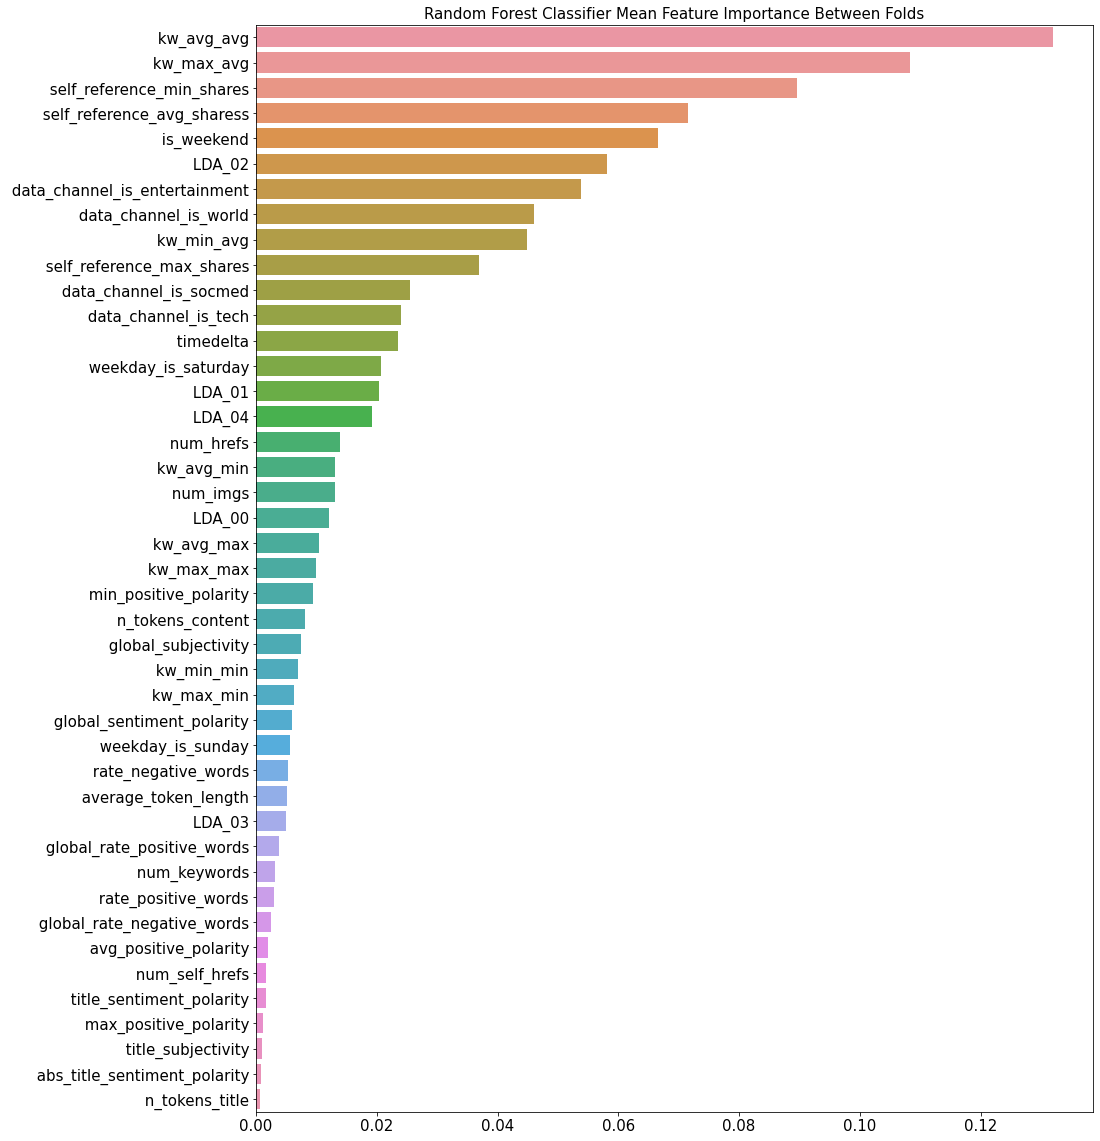

In [25]:
importances['Mean_Importance'] = importances.mean(axis=1)
importances.sort_values(by='Mean_Importance', inplace=True, ascending=False)

plt.figure(figsize=(15, 20))
sns.barplot(x='Mean_Importance', y=importances.index, data=importances)

plt.xlabel('')
plt.tick_params(axis='x', labelsize=15)
plt.tick_params(axis='y', labelsize=15)
plt.title('Random Forest Classifier Mean Feature Importance Between Folds', size=15)

plt.show()


下面是ROC曲线图，平均AUC=0.709，说明模型表现良好。

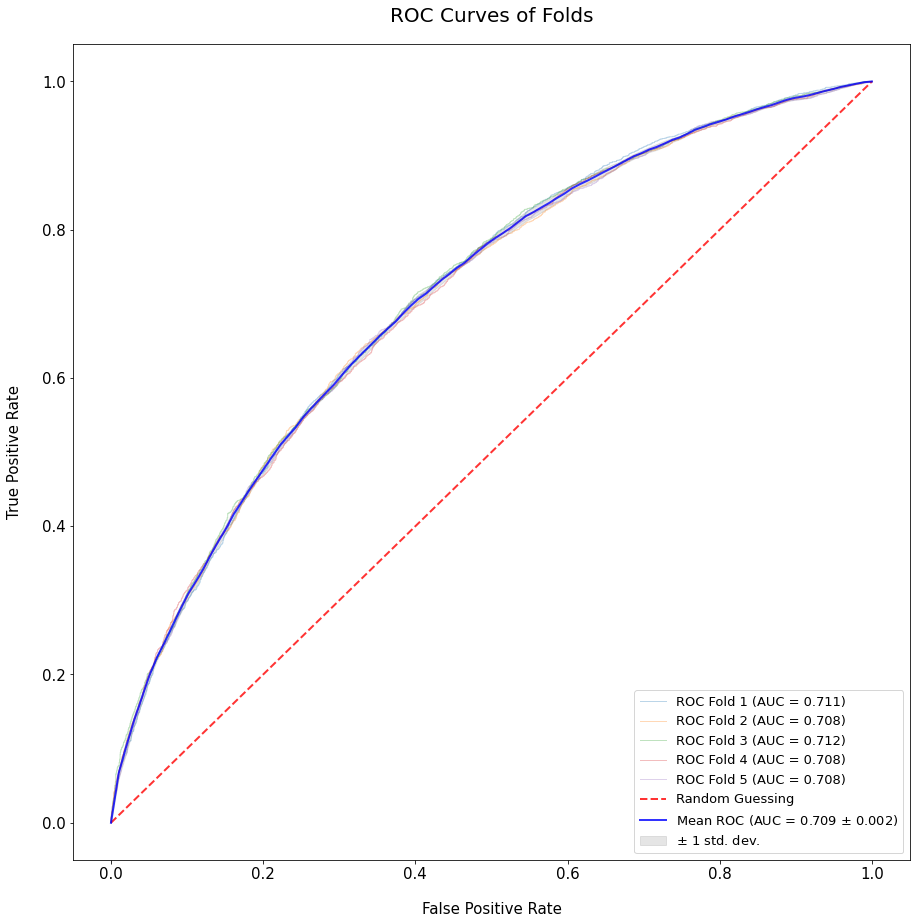

In [26]:
def plot_roc_curve(fprs, tprs):
    
    tprs_interp = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    f, ax = plt.subplots(figsize=(15, 15))
    
    # 对每一个fold画ROC曲线并计算AUC值
    for i, (fpr, tpr) in enumerate(zip(fprs, tprs), 1):
        tprs_interp.append(np.interp(mean_fpr, fpr, tpr))
        tprs_interp[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC Fold {} (AUC = {:.3f})'.format(i, roc_auc))
        
    # 随机猜测的ROC曲线值
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', alpha=0.8, label='Random Guessing')
    
    mean_tpr = np.mean(tprs_interp, axis=0)
    mean_tpr[-1] = 1.0
    mean_auc = auc(mean_fpr, mean_tpr)

    std_auc = np.std(aucs)
    
    # 画平均值的ROC曲线
    ax.plot(mean_fpr, mean_tpr, color='b', label='Mean ROC (AUC = {:.3f} $\pm$ {:.3f})'.format(mean_auc, std_auc), lw=2, alpha=0.8)
    
    # 围绕平均值的ROC曲线画标准差
    std_tpr = np.std(tprs_interp, axis=0)
    tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
    tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
    ax.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2, label='$\pm$ 1 std. dev.')
    
    ax.set_xlabel('False Positive Rate', size=15, labelpad=20)
    ax.set_ylabel('True Positive Rate', size=15, labelpad=20)
    ax.tick_params(axis='x', labelsize=15)
    ax.tick_params(axis='y', labelsize=15)
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])

    ax.set_title('ROC Curves of Folds', size=20, y=1.02)
    ax.legend(loc='lower right', prop={'size': 13})
    
    plt.show()

plot_roc_curve(fprs, tprs)


综上，我们分析了新闻报道的常见特征和它们对新闻流行程度的影响，并拟合了对应的模型，得到了良好的结果。